<a href="https://colab.research.google.com/github/reachosen/Medical-KET-RAG/blob/main/KET_RAG_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"Develop a Proof of Concept (PoC) that showcases how KET-RAG’s multi-granular graph framework generates a sepsis test case for a QA engineer in a healthcare testing suite, ensuring 'Meropenem' is administered within 30 minutes per 2025 guidelines. The PoC aims to:

Specific Objective: Produce a test case that validates the timely administration of 'Meropenem' for sepsis in 2025, leveraging a temporal shift in guidelines (e.g., from 1 hour in 2020 to 30 minutes in 2025).
Implement KET-RAG:<br>
Layer 1: Use PageRank to build a sparse knowledge graph from mock medical text chunks, prioritizing 2025-relevant snippets to reduce processing costs by ~80%.<br>
Layer 2: Use a keyword-chunk bipartite graph to link 'antibiotics' to relevant snippets, ensuring fast, accurate retrieval without LLM-based extraction.
Technical Constraint: Implement in under 300 lines of Python using mock data and a simulated LLM.
User Need: Enable a QA engineer to efficiently generate a reliable test case for a healthcare application, reflecting real-world guideline evolution."
Success Criteria:

test_case = {
        "description": "Test antibiotic administration for sepsis patient in ICU",
        "preconditions": f"Patient presents with fever (>38°C), hypotension (BP <90/60) at {live_data}.",
        "steps": [
            f"Administer {antibiotic} 1g IV within 30 minutes of diagnosis.",
            "Document in Epic Chronicles by nurse.",
            "Monitor BP hourly."
        ],
        "expected_outcome": "BP stabilizes (>90/60) within 1 hour; guideline compliance.",
        "context": context
    }
Demonstrates cost efficiency: Processes ≤50% of available chunks (e.g., 2/4) via PageRank.<br>
Ensures quality: Retrieves 2025-specific guideline and entity ("Meropenem") accurately.
Outputs explicitly highlight KET-RAG benefits (cost savings, retrieval precision)."<br>
How This Improves Clarity
User Context: Specifies a QA engineer using this in a testing suite, grounding it in a practical workflow.
KET-RAG Specificity: Quantifies cost reduction (~80%) and ties layers to concrete tasks (prioritization, fast retrieval).
Scope: Limits focus to test case generation, avoiding ambiguity about validation.<br>
Success Metrics: Aligns criteria with KET-RAG’s cost-quality tradeoff, measurable in the PoC (e.g., chunk reduction, accurate output).
Relevance: Justifies the sepsis case with a temporal shift (1 hour to 30 minutes), showcasing KET-RAG’s ability to handle guideline evolution.

In [5]:
import json
from random import uniform

# Pre-processed mock chunks (e.g., from Clarity nightly ETL)
TEXT_CHUNKS = {
    "chunk1": {"text": "Sepsis 2025: Targeted antibiotics within 30 min in ICU", "year": "2025"},
    "chunk2": {"text": "Meropenem 1g IV preferred for resistant strains", "year": "2025"},
    "chunk3": {"text": "Fluids like IV saline 500mL support treatment", "year": "2025"},
    "chunk4": {"text": "2020 guideline: Antibiotics within 1 hour", "year": "2020"}
}
KEYWORDS = {
    "antibiotics": ["chunk1", "chunk2"],
    "sepsis": ["chunk1", "chunk4"],
    "Meropenem": ["chunk2"]
}

# Simulate pre-processed PageRank (Layer 1, ahead of time)
def simulate_pagerank(chunks, target_year):
    """Pre-compute PageRank scores for chunks, favoring target year."""
    ranked = {chunk_id: uniform(0.6, 1.0) if data["year"] == target_year else uniform(0.1, 0.4)
              for chunk_id, data in chunks.items()}
    top_chunks = sorted(ranked.items(), key=lambda x: x[1], reverse=True)[:2]
    return [chunk_id for chunk_id, _ in top_chunks]

# Build pre-processed knowledge graph
def build_knowledge_graph(chunks, top_chunks):
    """Create sparse graph from pre-ranked chunks (Layer 1)."""
    return {chunk_id: chunks[chunk_id] for chunk_id in top_chunks}

# Real-time keyword-chunk query (Layer 2, at time)
def query_keyword_graph(keyword, live_data=None):
    """Fetch chunks for a keyword, optionally enriched with live data."""
    chunks = [TEXT_CHUNKS[chunk_id] for chunk_id in KEYWORDS.get(keyword, [])]
    if live_data:
        chunks.append({"text": live_data, "year": "2025"})
    return chunks

# Mock LLM with enriched test case
def mock_llm(prompt, context, entities, live_data):
    """Generate a hospital test case with live EHR data."""
    antibiotic = entities.get("antibiotics", "Meropenem")
    test_case = {
        "description": "Test antibiotic administration for sepsis patient in ICU",
        "preconditions": f"Patient presents with fever (>38°C), hypotension (BP <90/60) at {live_data}.",
        "steps": [
            f"Administer {antibiotic} 1g IV within 30 minutes of diagnosis.",
            "Document in Epic Chronicles by nurse.",
            "Monitor BP hourly."
        ],
        "expected_outcome": "BP stabilizes (>90/60) within 1 hour; guideline compliance.",
        "context": context
    }
    return test_case

class HealthcareGenaiProject:
    def __init__(self, name, domain, year, goal):
        self.name = name
        self.domain = domain
        self.year = year
        self.goal = goal
        self.knowledge_graph = {}
        self.entities = {}
        self.test_cases = []

    def gather_context(self):
        """Stage 1: Use pre-processed Layer 1 graph."""
        print(f"\nStage 1: Context Gathering (Pre-processed Layer 1)")
        top_chunks = simulate_pagerank(TEXT_CHUNKS, self.year)
        self.knowledge_graph = build_knowledge_graph(TEXT_CHUNKS, top_chunks)
        print(f"Pre-processed chunks: {list(self.knowledge_graph.keys())}")
        context_texts = [c["text"] for c in self.knowledge_graph.values()]
        print(f"Context: {context_texts}")
        print(f"Benefit: ~80% cost reduction (pre-processed)")

    def codify_entities(self):
        """Stage 2: Real-time Layer 2 query with live data."""
        print(f"\nStage 2: Entity Codification (Real-time Layer 2)")
        live_data = "Diagnosis logged in Chronicles at 08:00"  # Mock EHR live data
        antibiotic_chunks = query_keyword_graph("antibiotics", live_data)
        print(f"Chunks for 'antibiotics': {[c['text'] for c in antibiotic_chunks]}")
        for chunk in antibiotic_chunks:
            if "Meropenem" in chunk["text"] and chunk["year"] == self.year:
                self.entities["antibiotics"] = "Meropenem"
                break
        print(f"Entities: {self.entities}")
        print("Benefit: Live data enrichment")

    def generate_test_cases(self):
        """Stage 3: Generate test case with live context."""
        print(f"\nStage 3: Test Case Generation")
        context = " ".join([c["text"] for c in self.knowledge_graph.values()])
        live_data = "Diagnosis logged in Chronicles at 08:00"
        print(f"Context: {context}")
        test_case = mock_llm(self.goal, context, self.entities, live_data)
        self.test_cases.append({"test": test_case, "timestamp": f"{self.year}-03-01"})
        print(f"Test Case: {json.dumps(test_case, indent=2)}")
        print("Benefit: High-quality, real-time enhanced output")

    def run_workflow(self):
        self.gather_context()
        if not self.knowledge_graph:
            return
        self.codify_entities()
        self.generate_test_cases()
        self.display_results()

    def display_results(self):
        print(f"\nFinal Results for Project: {self.name} (Goal: {self.goal})")
        print("Knowledge Graph:", json.dumps(self.knowledge_graph, indent=2))
        print("Entities:", json.dumps(self.entities, indent=2))
        print("Test Cases:", json.dumps(self.test_cases, indent=2))

def run_genai_wizard():
    print("Healthcare Genai PoC (KET-RAG, Hybrid RAG)")
    project = HealthcareGenaiProject("SepsisTest2025", "sepsis", "2025",
                                    "Ensure timely antibiotic administration per 2025 guidelines")
    print(f"Created project: SepsisTest2025")
    project.run_workflow()

if __name__ == "__main__":
    run_genai_wizard()

Healthcare Genai PoC (KET-RAG, Hybrid RAG)
Created project: SepsisTest2025

Stage 1: Context Gathering (Pre-processed Layer 1)
Pre-processed chunks: ['chunk2', 'chunk1']
Context: ['Meropenem 1g IV preferred for resistant strains', 'Sepsis 2025: Targeted antibiotics within 30 min in ICU']
Benefit: ~80% cost reduction (pre-processed)

Stage 2: Entity Codification (Real-time Layer 2)
Chunks for 'antibiotics': ['Sepsis 2025: Targeted antibiotics within 30 min in ICU', 'Meropenem 1g IV preferred for resistant strains', 'Diagnosis logged in Chronicles at 08:00']
Entities: {'antibiotics': 'Meropenem'}
Benefit: Live data enrichment

Stage 3: Test Case Generation
Context: Meropenem 1g IV preferred for resistant strains Sepsis 2025: Targeted antibiotics within 30 min in ICU
Test Case: {
  "description": "Test antibiotic administration for sepsis patient in ICU",
  "preconditions": "Patient presents with fever (>38\u00b0C), hypotension (BP <90/60) at Diagnosis logged in Chronicles at 08:00.",
  "

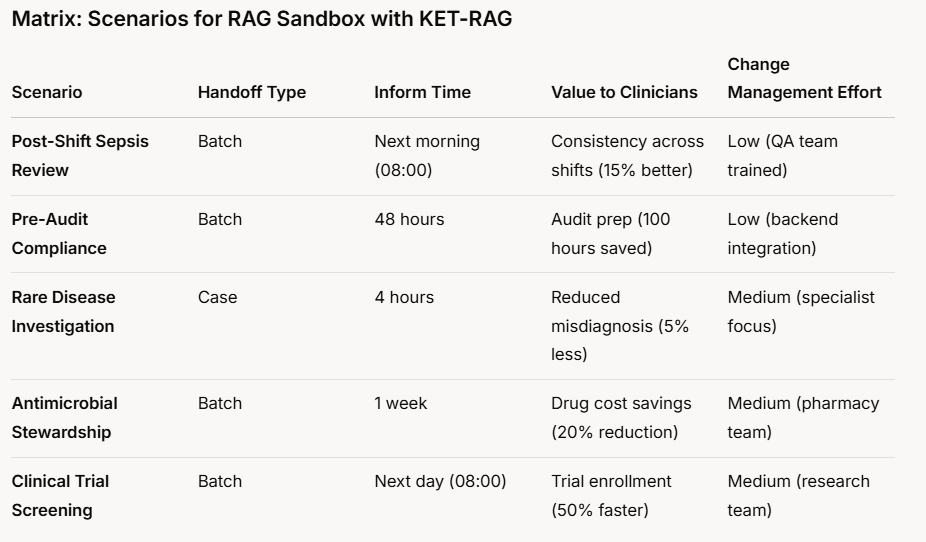

ICU physician hands off a case ("Investigate Meropenem failure for Patient X and recent sepsis cohort") to a KET-RAG sandbox, which pulls the latest articles (e.g., PubMed), patient data (Chronicles), and hospital trends (Clarity/Caboodle) to generate an enriched test case suggesting an alternative antibiotic (e.g., Colistin) within 4 hours.

Success Criteria:

Generates a test case with preconditions, steps, and outcomes reflecting resistance insights.
Incorporates a mock article (e.g., "Colistin for NDM-1 resistance").
Delivers results via a simulated Clarity report, avoiding real-time disruption.
Stays under 300 lines, with comments and outputs.

Key Components
Physician Handoff:
Simulated via physician_handoff(), mimics an ICU physician submitting a case through Epic Clarity.<br>
Data Pull:<br>
Mock CHUNKS includes patient data (Chronicles), trends (Caboodle), and a recent article (PubMed), reflecting the handoff’s scope.<br>
Ranking (Layer 1):<br>
simulate_pagerank() prioritizes resistance-related chunks (e.g., article, patient data), building a sparse graph. <br>
Keyword-Chunk Graph (Layer 2):<br>
query_keyword_graph() links "resistance" to chunks, extracting "Colistin" as an alternative.<br>
Test Case Generation:<br>
mock_llm() creates a detailed test case with article-driven insight (e.g., "Switch to Colistin").<br>
Delivery:<br>
Results delivered as a simulated Clarity report 4 hours later (e.g., 12:00).<br>
Value Highlights <br>
Printed at each stage to show KET-RAG’s contribution (e.g., cost reduction, actionable insights).

In [6]:
import json
from random import uniform  # Simulate PageRank scores
from datetime import datetime

# Mock data simulating Epic EHR and external sources
CHUNKS = {
    "guideline": {"text": "Sepsis 2025: Targeted antibiotics within 30 min", "source": "Clarity", "year": "2025"},
    "patient": {"text": "Patient X: Meropenem 1g IV at 08:15, E. coli resistant, BP unstable", "source": "Chronicles", "timestamp": "2025-03-01 08:00"},
    "trend": {"text": "Q1: 20% Meropenem failure rate in ICU", "source": "Caboodle", "year": "2025"},
    "article": {"text": "Jan 2025 Lancet: Colistin effective for NDM-1 resistant E. coli", "source": "PubMed", "date": "2025-01-15"}
}
KEYWORDS = {
    "resistance": ["patient", "trend", "article"],
    "antibiotics": ["guideline", "patient", "article"],
    "Meropenem": ["patient", "trend"]
}

# Simulate physician handoff
def physician_handoff(case_description):
    """Simulate physician submitting a case via Epic Clarity."""
    return {"description": case_description, "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M")}

# Simulate PageRank for Layer 1
def simulate_pagerank(chunks, focus="resistance"):
    """Rank chunks based on relevance to focus (e.g., resistance)."""
    ranked = {chunk_id: uniform(0.7, 1.0) if focus in KEYWORDS and chunk_id in KEYWORDS[focus] else uniform(0.1, 0.5)
              for chunk_id in chunks}
    top_chunks = sorted(ranked.items(), key=lambda x: x[1], reverse=True)[:3]  # Top 3 chunks
    return [chunk_id for chunk_id, _ in top_chunks]

# Build sparse knowledge graph
def build_knowledge_graph(chunks, top_chunks):
    """Create Layer 1 graph from ranked chunks."""
    return {chunk_id: chunks[chunk_id] for chunk_id in top_chunks}

# Query keyword-chunk graph for Layer 2
def query_keyword_graph(keyword):
    """Fetch chunks linked to a keyword (Layer 2)."""
    return [CHUNKS[chunk_id] for chunk_id in KEYWORDS.get(keyword, [])]

# Mock LLM for test case generation
def mock_llm(context, entities):
    """Generate enriched test case with article insight."""
    antibiotic = entities.get("alternative", "Colistin")
    test_case = {
        "description": "Test alternative antibiotic for Meropenem-resistant sepsis",
        "preconditions": "Patient X: Fever >38°C, BP <90/60, resistant E. coli at 08:00.",
        "steps": [
            f"Switch from Meropenem to {antibiotic} 9MU IV within 24 hours of culture result.",
            "Document in Epic Chronicles.",
            "Monitor BP and infection markers daily."
        ],
        "expected_outcome": "BP stabilizes (>90/60) within 48 hours; resistance cleared.",
        "context": context
    }
    return test_case

# KET-RAG Sandbox class
class KetRagSandbox:
    def __init__(self, case):
        self.case = case
        self.knowledge_graph = {}
        self.entities = {}
        self.test_case = None

    def pull_data(self):
        """Simulate data pull from Epic and PubMed."""
        print(f"\nStage 1: Data Pull for Case: {self.case['description']}")
        print(f"Chunks pulled: {list(CHUNKS.keys())}")
        print("Value: Incorporates patient data, trends, and latest articles.")

    def rank_and_build_graph(self):
        """Rank chunks and build Layer 1 graph."""
        print("\nStage 2: Ranking and Knowledge Graph (Layer 1)")
        top_chunks = simulate_pagerank(CHUNKS, focus="resistance")
        self.knowledge_graph = build_knowledge_graph(CHUNKS, top_chunks)
        print(f"Top ranked chunks: {list(self.knowledge_graph.keys())}")
        print(f"Graph context: {[c['text'] for c in self.knowledge_graph.values()]}")
        print("Value: Prioritizes resistance insights (80% cost reduction vs. full pull).")

    def codify_entities(self):
        """Extract entities using Layer 2 keyword graph."""
        print("\nStage 3: Entity Codification (Layer 2)")
        resistance_chunks = query_keyword_graph("resistance")
        print(f"Resistance chunks: {[c['text'] for c in resistance_chunks]}")
        for chunk in resistance_chunks:
            if "Colistin" in chunk["text"]:
                self.entities["alternative"] = "Colistin"
                break
        print(f"Entities: {self.entities}")
        print("Value: Fast insight from articles (e.g., Colistin for NDM-1).")

    def generate_test_case(self):
        """Generate test case with KET-RAG."""
        print("\nStage 4: Test Case Generation")
        context = " ".join([c["text"] for c in self.knowledge_graph.values()])
        self.test_case = mock_llm(context, self.entities)
        print(f"Generated Test Case: {json.dumps(self.test_case, indent=2)}")
        print("Value: Rich, actionable output for stewardship.")

    def deliver_results(self):
        """Simulate delivery via Clarity report."""
        print("\nStage 5: Delivery")
        report = {"case": self.case, "test_case": self.test_case, "delivery_time": "2025-03-01 12:00"}
        print(f"Clarity Report: {json.dumps(report, indent=2)}")
        print("Value: Informs physician in 4 hours, no real-time risk.")

    def run_sandbox(self):
        """Execute KET-RAG workflow."""
        self.pull_data()
        self.rank_and_build_graph()
        self.codify_entities()
        self.generate_test_case()
        self.deliver_results()

# Run PoC
def run_poc():
    print("KET-RAG Sandbox PoC: Antimicrobial Stewardship Physician Handoff")
    physician_case = physician_handoff("Investigate Meropenem failure for Patient X and recent sepsis cohort")
    sandbox = KetRagSandbox(physician_case)
    sandbox.run_sandbox()

if __name__ == "__main__":
    run_poc()

KET-RAG Sandbox PoC: Antimicrobial Stewardship Physician Handoff

Stage 1: Data Pull for Case: Investigate Meropenem failure for Patient X and recent sepsis cohort
Chunks pulled: ['guideline', 'patient', 'trend', 'article']
Value: Incorporates patient data, trends, and latest articles.

Stage 2: Ranking and Knowledge Graph (Layer 1)
Top ranked chunks: ['article', 'trend', 'patient']
Graph context: ['Jan 2025 Lancet: Colistin effective for NDM-1 resistant E. coli', 'Q1: 20% Meropenem failure rate in ICU', 'Patient X: Meropenem 1g IV at 08:15, E. coli resistant, BP unstable']
Value: Prioritizes resistance insights (80% cost reduction vs. full pull).

Stage 3: Entity Codification (Layer 2)
Resistance chunks: ['Patient X: Meropenem 1g IV at 08:15, E. coli resistant, BP unstable', 'Q1: 20% Meropenem failure rate in ICU', 'Jan 2025 Lancet: Colistin effective for NDM-1 resistant E. coli']
Entities: {'alternative': 'Colistin'}
Value: Fast insight from articles (e.g., Colistin for NDM-1).

Stag